# INTRODUCTION TO DATA VISUALIZATION WITH PYTHON SEABORN

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import scipy as sp

import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier as MLPC

import matplotlib.pyplot as plt
import seaborn as sns

from toolbox.tools import *

In [3]:
df_gm = pd.read_csv('data\\dataframe.csv')
df_ml = pd.read_csv('data\\dataframe_ml.csv')
df_ts = generate_time_series(len_series=100, n_conditions=2, n_individuals=50)
df_ln = generate_linear(n_individuals=1000, n_conditions=2)
df_pl = generate_poly(n_individuals=1000, n_conditions=2, order=2)
X, y = generate_X_y(df_ml, list(df_ml.drop('twitch', 1)), 'twitch')
X_validation, y_validation, X_test, y_test = generating_validation_test(X, y)

WHAT, WHY, WHERE, HOW DATA VISUALIZATION

BRIEF INTRODUCTION PANDAS DATAFRAMES, MATPLOTLIB AND SEABORN

EXPLORATORY DATA VISUALIZATION

* distplot and count plot
* ridge plot
* Joint kernel density estimate

EXERCISE 1

* revelation of the data source
* discover the characteristics of the dataframe you are working on
* discover anomalies in the data

## DATA VISUALIZATION FOR HYPOTHESIS TESTING

### Visualize time series data across consitions

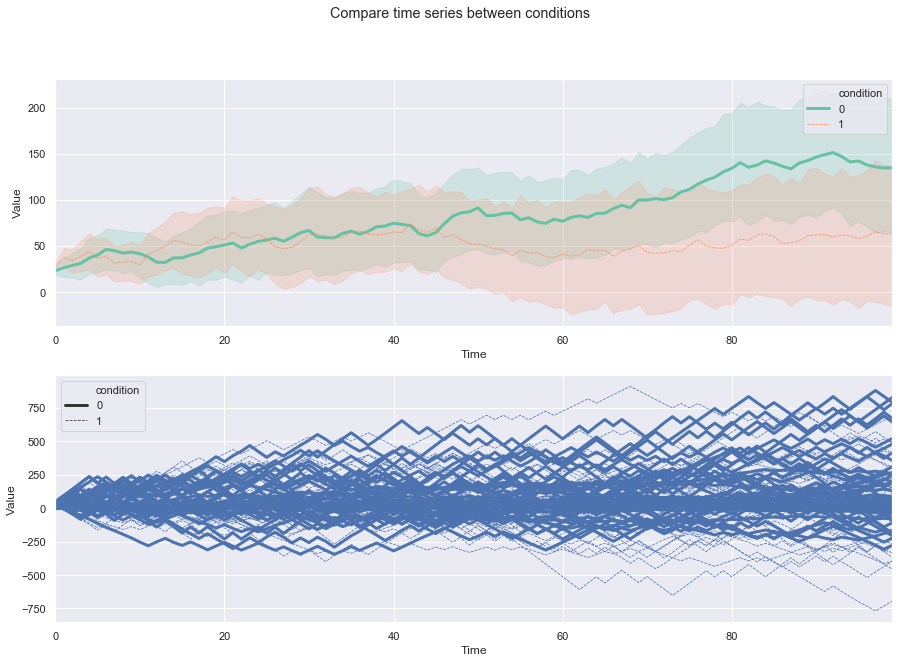

In [4]:
sns.set()
fig,axs = plt.subplots(2, 1, figsize = (15, 10))
sns.lineplot(x='time'
             , y='value'
             , hue='condition'
             , size='condition'
             , style='condition'
             , data=df_ts
             , palette='Set2'
             , ax = axs[0]
            )
sns.lineplot(x='time'
             , y='value'
             , size='condition'
             , style='condition'
             , data=df_ts
             , palette='Set2'
             , units='individual'
             , estimator=None
             , ax = axs[1]
            )
plt.suptitle('Compare time series between conditions')
for ax in axs:
    
    ax.set_xlim(min(df_ts['time']), max(df_ts['time']))
    ax.set_xlim(min(df_ts['time']), max(df_ts['time']))
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

plt.show()

### Visualize the reletionship between variables

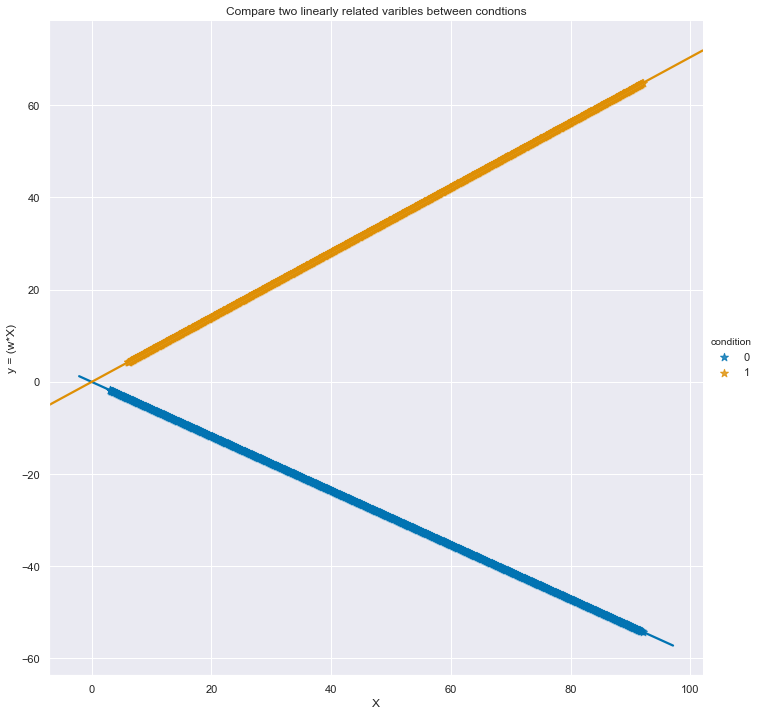

In [5]:
sns.set()
sns.lmplot(x='x'
           , y='y'
           , hue='condition'
           , palette='colorblind'
           , markers='*'
           , data=df_ln
           , height=10
           , scatter_kws={'s': 70}
           )
plt.title('Compare two linearly related varibles between condtions')
plt.xlabel('X')
plt.ylabel('y = (w*X)')
plt.show()

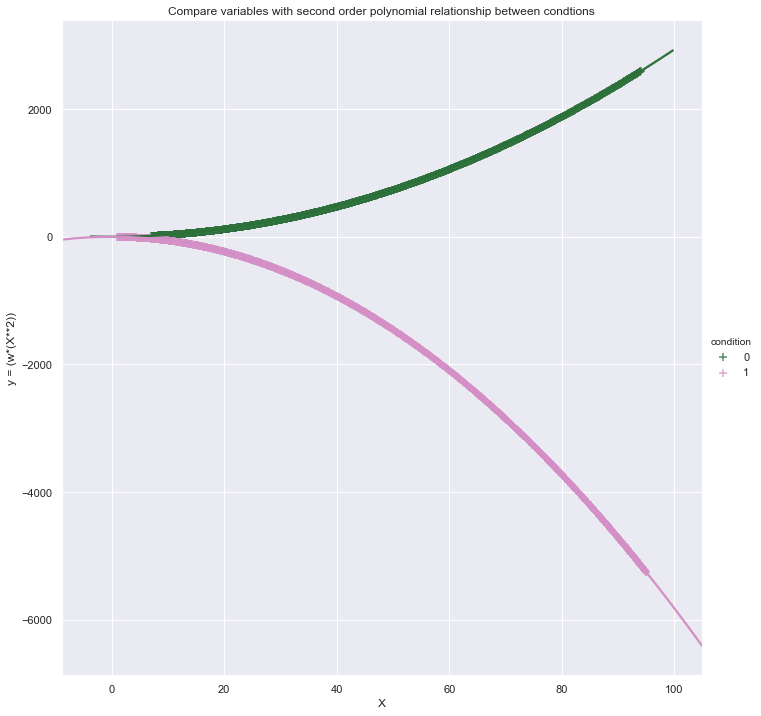

In [6]:
sns.lmplot(x='x'
           , y='y'
           , hue='condition'
           , palette='cubehelix'
           , markers='+'
           , order=2
           , data=df_pl
           , height=10
           , scatter_kws={'s': 70}
           )
plt.title('Compare variables with second order polynomial relationship between condtions')
plt.xlabel('X')
plt.ylabel('y = (w*(X**2))')
plt.show()

In [7]:
df_sy = generate_synthetic(n_categorical=0, n_scalar=10, n_rows=10000)
df_corr = df_sy.corr()
mask = df_corr < 0

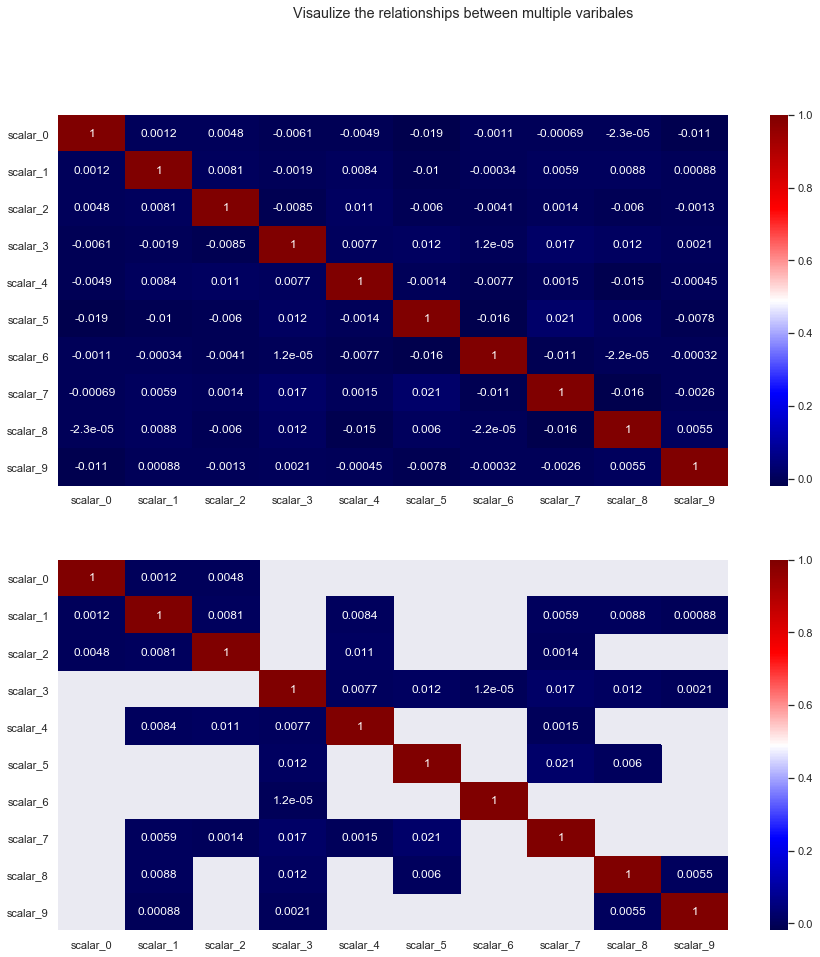

In [8]:
fig, axs = plt.subplots(2,1,figsize=(15,15))
sns.heatmap(data=df_corr
            , cmap='seismic'
            , annot=True
            , ax = axs[0]
            )
sns.heatmap(data=df_corr
            , cmap='seismic'
            , annot=True
            , mask=mask
            , ax = axs[1]
            )
plt.suptitle('Visaulize the relationships between multiple varibales')
plt.show()

### Compare between multiple conditions

In [9]:
df_sy = generate_synthetic(n_categorical=2, n_scalar=1, n_rows=10000)

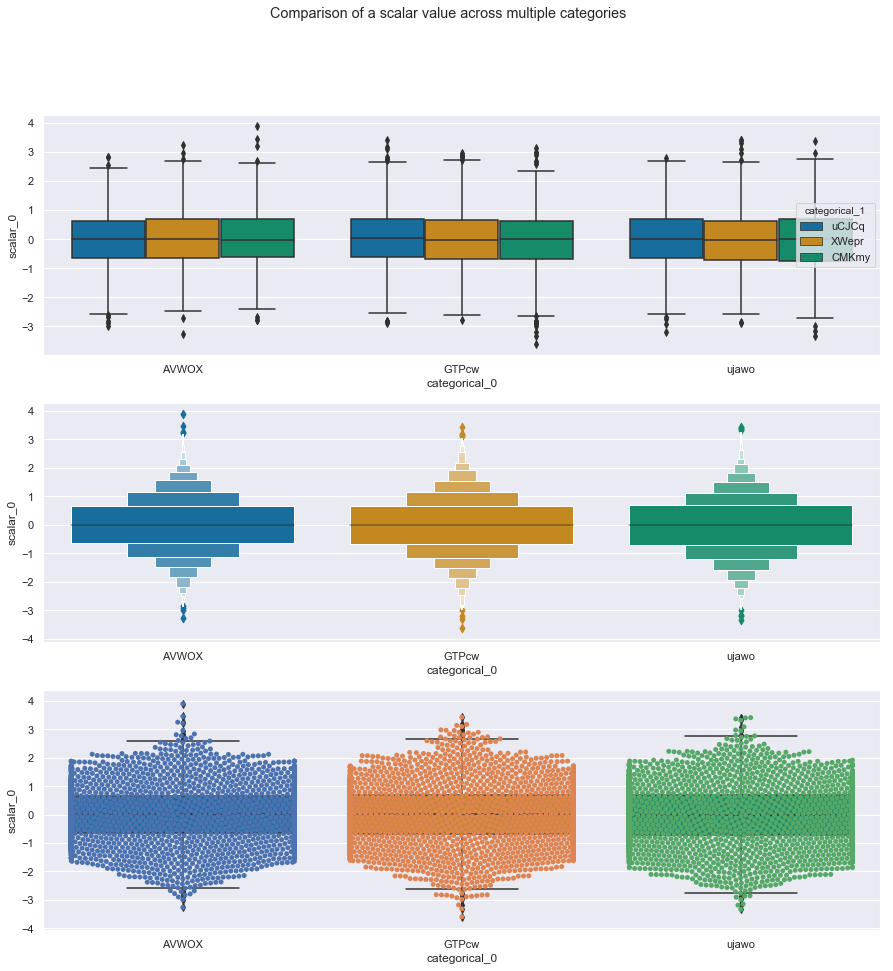

In [10]:
fig, axs = plt.subplots(3,1,figsize=(15,15))
sns.boxplot(x='categorical_0'
            , y='scalar_0' 
            , palette='colorblind'
            , hue='categorical_1'
            , ax=axs[0]
            , data=df_sy
            )
sns.boxenplot(x='categorical_0'
              , y='scalar_0' 
              , palette='colorblind'
              , ax=axs[1]
              , data=df_sy
              )
sns.boxplot(x='categorical_0'
            , y='scalar_0' 
            , palette='colorblind'
            , ax=axs[2]
            , data=df_sy
            )
sns.swarmplot(x='categorical_0'
              , y='scalar_0' 
              , cmap='colorblind'
              , ax=axs[2]
              , data=df_sy
              )

plt.suptitle('Comparison of a scalar value across multiple categories')
plt.show()

### EXERCISE 2

Using the df_gm formulate your own hypothesis and test it visually

* Given the data you have access to, think to a question you want, and you can, answer to
* Think at which kind of information you need to extract from the data for answering your question
* Think which visualization would best suit your purposes
* Think at which audience you want to present your visualization
* Think if you have any kind of constrains (i.e. temporal, skill ecc..) and how you can minimize their impact

## DATA VISUALIZATION FOR MODEL EVALUATION

In [11]:
classifiers = {'K-nearest Neighbors' : KNN(n_jobs = -1)
               , 'Logistic Regression' : LogisticRegression(max_iter = 200, class_weight = 'balanced', solver='sag', n_jobs = -1)
               , 'Random Forest' : RandomForestClassifier(class_weight = 'balanced', n_jobs = -1)
               , 'Multilayer Perceptron' :  MLPC(max_iter = 200)
              }

### Compare the performance of different models

In [12]:
splitter = StratifiedShuffleSplit(n_splits=10)

In [13]:
scores = []
names = []
for name, classifier in classifiers.items():
    
    for train_index, test_index in splitter.split(X, y):
        
        classifier.fit(X[train_index], y[train_index])
        scores.append(classifier.score(X[test_index], y[test_index]))
        names.append(name)

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\penthotal\a

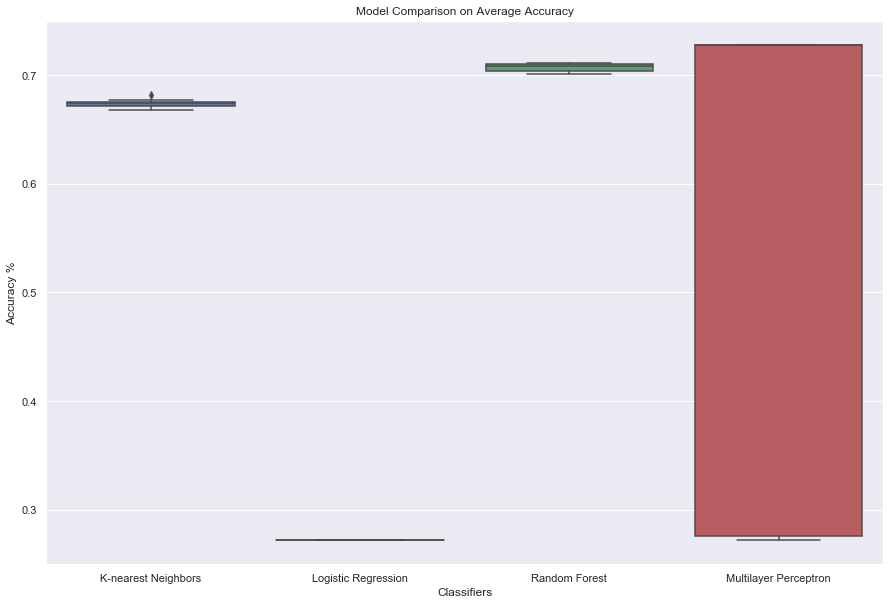

In [14]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = names, y = scores, orient = 'v')
plt.title('Model Comparison on Average Accuracy')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy %')
plt.show()

### Evaluate a model more in detail

In [15]:
splitter = StratifiedShuffleSplit(n_splits=10)
param_grid = {'hidden_layer_sizes' : [(10, 10, 10), (50, 50, 50), (100, 100, 100)]
              , 'activation' : ['tanh', 'relu']
              , 'alpha' : [10.0, 1.0, 0.1, 0.001, 0.0001]
             }


In [16]:
searcher = GridSearchCV(estimator=classifiers['Multilayer Perceptron']
                        , param_grid=param_grid
                        , cv=splitter
                        , scoring = 'roc_auc'
                        , n_jobs = -1
                       )
searcher.fit(X_validation, y_validation)
best_estimator = searcher.best_estimator_
y_predicted = best_estimator.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

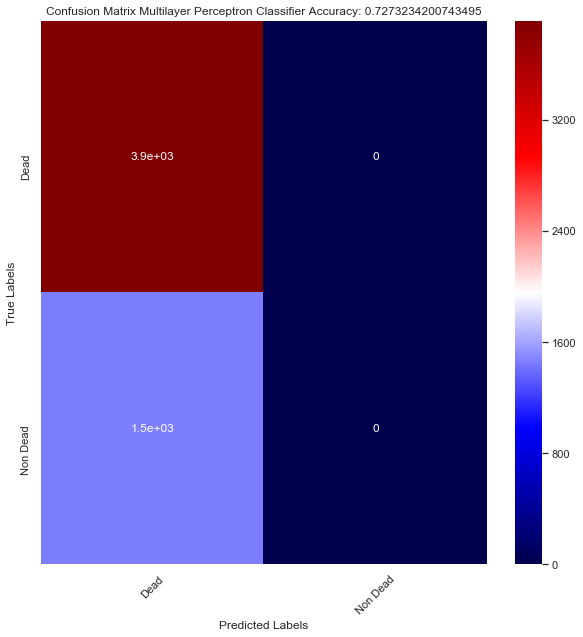

In [17]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cmap='seismic')
plt.xticks([0.5, 1.5], ['Dead', 'Non Dead'], rotation=45)
plt.yticks([0.5, 1.5], ['Dead', 'Non Dead'])
plt.title('Confusion Matrix Multilayer Perceptron Classifier Accuracy: {}'.format(best_estimator.score(X_test, y_test)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

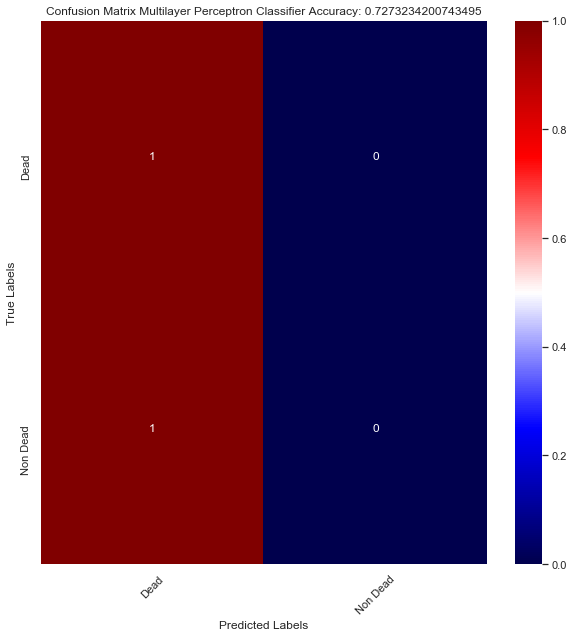

In [18]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm / cm.sum(axis=1)[:, np.newaxis], annot = True, cmap='seismic')
plt.xticks([0.5, 1.5], ['Dead', 'Non Dead'], rotation=45)
plt.yticks([0.5, 1.5], ['Dead', 'Non Dead'])
plt.title('Confusion Matrix Multilayer Perceptron Classifier Accuracy: {}'.format(best_estimator.score(X_test, y_test)))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Visualize the learning process

In [19]:
best_estimator

MLPClassifier(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [20]:
loss_v = []
accuracy_v = []
accuracy_ts = []
epochs = [i for i in range(100)]
model = MLPC(activation='tanh', alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=1, warm_start=True)

In [21]:
for epoch in epochs:
    
    model.fit(X_validation, y_validation)
    loss_v.append(model.loss_)
    accuracy_v.append(model.score(X_validation, y_validation))
    accuracy_ts.append(model.score(X_test, y_test))

c:\users\penthotal\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


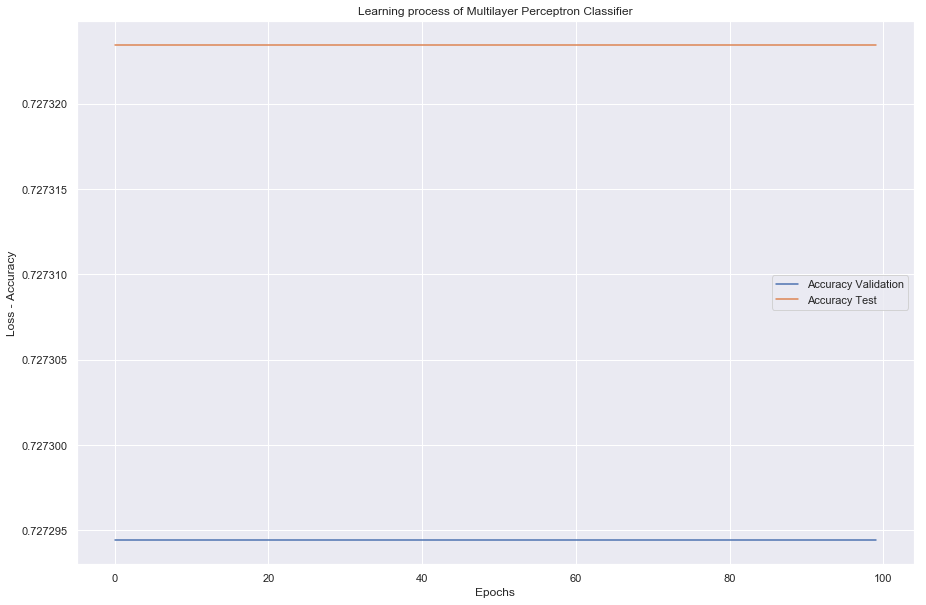

In [22]:
plt.figure(figsize = (15, 10))
#sns.lineplot(y= loss_v, x=epochs, label = 'Loss Validation')
sns.lineplot(y= accuracy_v, x=epochs, label = 'Accuracy Validation')
sns.lineplot(y= accuracy_ts, x=epochs,  label = 'Accuracy Test' )
plt.title('Learning process of Multilayer Perceptron Classifier')
plt.xlabel('Epochs')
plt.ylabel('Loss - Accuracy')
plt.legend()
plt.show()

### Inspect the prediction

In [23]:
y_predicted = classifiers['Random Forest'].fit(X_validation, y_validation).predict(X_test)
major_components = PCA(n_components = 2).fit_transform(X_test)
colors_gt = ['b' if label == 0 else 'r' for label in y_test]
colors_pr = ['r' if prediction != ground_truth else 'b' for prediction, ground_truth in zip(y_predicted, y_test)]

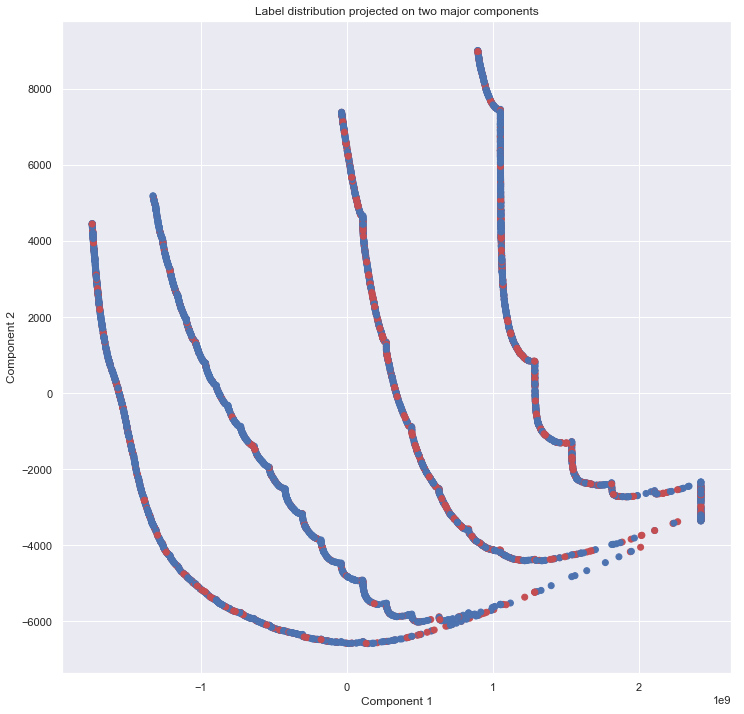

In [24]:
plt.figure(figsize=(12,12))
plt.scatter(major_components[:,0], major_components[:,1], c = colors_gt)
plt.title('Label distribution projected on two major components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

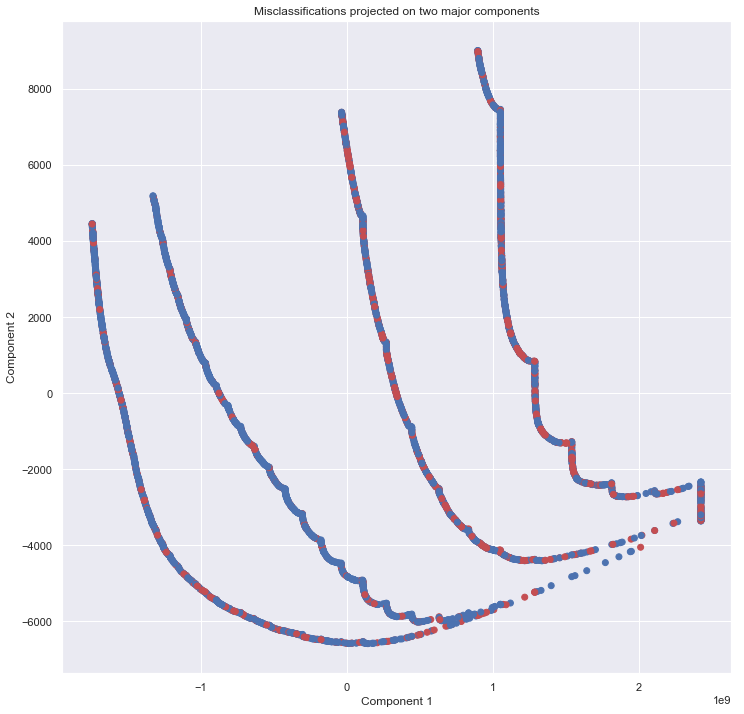

In [25]:
plt.figure(figsize=(12,12))
plt.scatter(major_components[:,0], major_components[:,1], c = colors_pr)
plt.title('Misclassifications projected on two major components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
plt.show()